In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df1 = pd.read_csv('Listings.csv')
df2= pd.read_csv('Reviews.csv')
mdf= pd.merge(df1,df2, on='listing_id')
mdf.head

C:\Users\baslv\AppData\Local\Temp\ipykernel_3856\1670624453.py:7: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Listings.csv')


<bound method NDFrame.head of          listing_id                                               name  \
0            281420     Beautiful Flat in le Village Montmartre, Paris   
1            281420     Beautiful Flat in le Village Montmartre, Paris   
2           3705183                    39 mÃ‚Â² Paris (Sacre CÃ…â€œur)   
3           3705183                    39 mÃ‚Â² Paris (Sacre CÃ…â€œur)   
4           3705183                    39 mÃ‚Â² Paris (Sacre CÃ…â€œur)   
...             ...                                                ...   
5373138    38683356            Nice and cosy mini-appartement in Paris   
5373139    38683356            Nice and cosy mini-appartement in Paris   
5373140    39659000  Charming apartment near Rue Saint Maur / Oberk...   
5373141    40219504        Cosy apartment with view on Canal St Martin   
5373142    40219504        Cosy apartment with view on Canal St Martin   

          host_id  host_since                 host_location  \
0         1466919 

In [5]:
#explore data
print('number of rows',mdf.shape)
print("\n Data types:\n ",mdf.dtypes)
null_counts = mdf.isnull().sum()
print("Null counts per column:")
print(null_counts)



number of rows (5373143, 36)

 Data types:
  listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights     

In [7]:
#delete missing values
missing_values = mdf.isnull().sum().sum()
if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print("There are {} missing values in the dataset.".format(missing_values))

duplicate_entries = mdf.duplicated().sum()
if duplicate_entries == 0:
    print("No duplicate entries in the dataset.")
else:
    print("There are {} duplicate entries in the dataset.".format(duplicate_entries))


There are 9036186 missing values in the dataset.
No duplicate entries in the dataset.


In [11]:
string_columns = mdf.select_dtypes(include='object').columns
mode_values = mdf[string_columns].mode().iloc[0]

mdf[string_columns] = mdf[string_columns].fillna(mode_values)


In [12]:
#delete missing values
missing_values = mdf.isnull().sum().sum()
if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print("There are {} missing values in the dataset.".format(missing_values))

duplicate_entries = mdf.duplicated().sum()
if duplicate_entries == 0:
    print("No duplicate entries in the dataset.")
else:
    print("There are {} duplicate entries in the dataset.".format(duplicate_entries))


There are 3011138 missing values in the dataset.
No duplicate entries in the dataset.


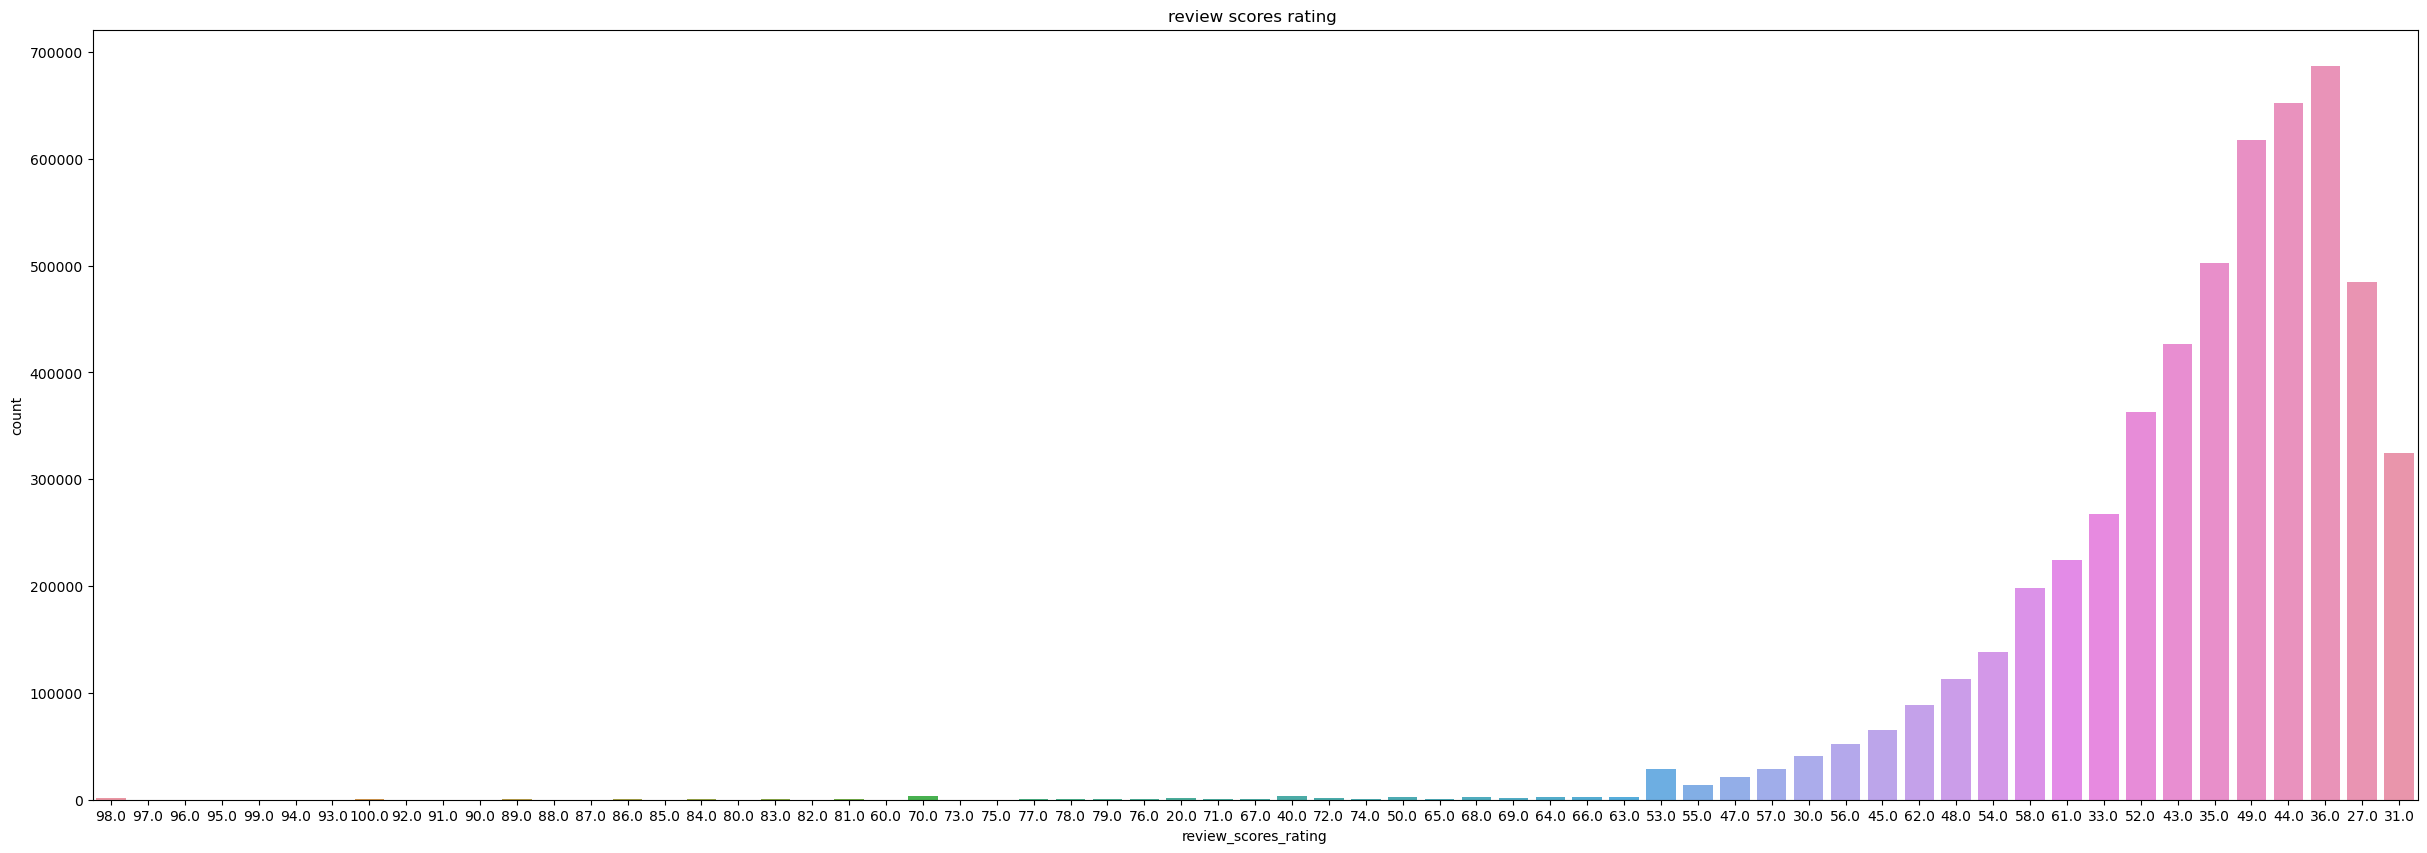

In [19]:
#data visualization
category_counts = mdf['review_scores_rating'].value_counts()

reshaped_labels = [(label) for label in category_counts.index]

plt.figure(figsize=(30, 10))
ax = sns.countplot(x='review_scores_rating', data=mdf)

ax.set_xticklabels(reshaped_labels)

# Set title and axis labels
plt.title('review scores rating ')
plt.xlabel('review_scores_rating')
plt.ylabel('count')
plt.show()


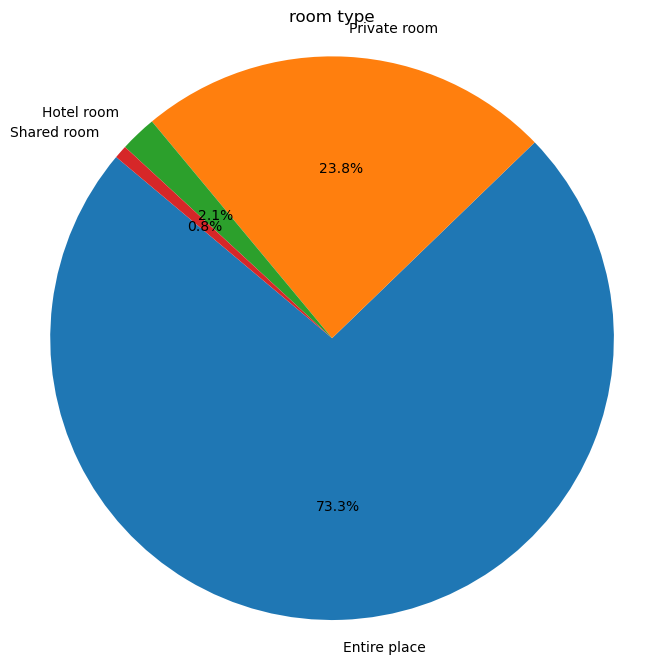

In [21]:
#data visualization
category_counts = mdf['room_type'].value_counts()

reshaped_labels = [(label) for label in category_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title ('room type')
plt.axis('equal') 
plt.show()


In [ ]:
#save data
file_path = "aribnb.csv"

mdf.to_csv(file_path, index=False)

print("Data saved successfully to:", file_path)
